In [1]:
import pandas 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import xgboost as xgb
import shap
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataframe = pandas.read_csv('Training_Tutorial.csv')

In [3]:
dataframe

,ABCIndex,AGCGGIndex,AcidicGroupCount,BasicGroupCount,SpAbs,SpMax,SpDiam,SpAD,SpMAD,LogEE,...,TSRW010,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,BOND
0,15.584859,12.370948,0,1,26.535341,2.394303,4.684013,26.535341,1.326767,3.932817,...,67.066251,281.110696,7.597586,895,28,104,121,5.666667,4.472222,-12.69
1,15.584859,12.370948,0,1,26.535341,2.394303,4.684013,26.535341,1.326767,3.932817,...,67.066251,285.085624,8.384871,895,28,104,121,5.666667,4.472222,-10.76
2,15.584859,12.370948,0,1,26.535341,2.394303,4.684013,26.535341,1.326767,3.932817,...,67.066251,301.056074,8.854590,895,28,104,121,5.666667,4.472222,-12.71
3,16.360915,13.103587,0,1,27.676625,2.405886,4.723253,27.676625,1.317935,3.980687,...,68.436034,335.017101,9.853444,1013,31,110,129,6.527778,4.666667,-13.15
4,16.360915,13.268604,0,1,27.660022,2.417166,4.747945,27.660022,1.317144,3.980695,...,68.452270,335.017101,9.853444,989,31,110,129,6.527778,4.666667,-12.77
5,10.675551,9.631085,0,1,18.288157,2.348646,4.626925,18.288157,1.306297,3.567111,...,58.909693,205.079396,7.595533,306,17,70,80,4.444444,3.194444,-10.91
6,15.584859,12.579330,0,1,26.524478,2.397385,4.692382,26.524478,1.326224,3.932822,...,67.074691,301.056074,8.854590,871,28,104,121,5.666667,4.472222,-12.05
7,16.360915,13.315249,0,1,27.666079,2.408368,4.727486,27.666079,1.317432,3.980691,...,68.443668,335.017101,9.853444,987,31,110,129,6.527778,4.666667,-11.93
8,11.382658,9.941843,0,1,19.243684,2.349964,4.609503,19.243684,1.282912,3.629494,...,60.141089,223.069974,8.261851,395,18,74,84,4.694444,3.444444,-9.80


In [4]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, param_grid, cv=10, scoring_fit='neg_mean_squared_error', do_probabilities=False):
    gs=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring=scoring_fit,
    verbose=2
    )
    fitted_model=gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred=fitted_model.predict_proba(X_test_data)
    else:
        pred=fitted_model.predict(X_test_data)
    return fitted_model, pred

In [5]:
X=dataframe
X=X.drop('BOND', axis=1)
Y=dataframe['BOND']
X_train, X_test, y_train, y_test=train_test_split(X,Y,random_state=0)

In [6]:
model=xgb.XGBRegressor()

In [7]:
param_grid={
    'n_estimator':[350,650,950],
    'colsample_bytree':[0.25,0.65,0.8],
    'max_depth':[8,11,14],
    'reg_alpha':[0.75,1.4,1.6],
    'reg_lambda':[0.43,0.65,1.3],
    'subsample':[0.6,0.85,0.9]
}

In [8]:
model,pred=algorithm_pipeline(X_train, X_test, y_train, y_test, model, param_grid,cv=5)
sample=model.best_params_
colsample_value=sample['colsample_bytree']
maxdepth_value=sample['max_depth']
nestimators_value=sample['n_estimator']
regalpha_value=sample['reg_alpha']
reglambda_value=sample['reg_lambda']
subsample_value=sample['subsample']

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  4.2min finished


[21:38:34] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [9]:
model1=XGBRegressor(verbosity=2,
                   colsample_bytree=colsample_value,
                   max_depth=maxdepth_value,
                   objective='reg:squarederror',
                   n_estimators=nestimators_value,
                   reg_alpha=regalpha_value,
                   reg_lambda=reglambda_value,
                   subsample=subsample_value)
model1.fit(X,Y)

[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:38:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_

[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_

[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_

[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_

[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:38:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.65, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=350, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.75,
             reg_lambda=0.43, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=2)

In [10]:
shap.initjs()

In [11]:
explainer=shap.TreeExplainer(model1)
shap_values=explainer.shap_values(X)

In [12]:
i=4
shap.force_plot(explainer.expected_value, shap_values[i],features=X.iloc[i],feature_names=X.columns)

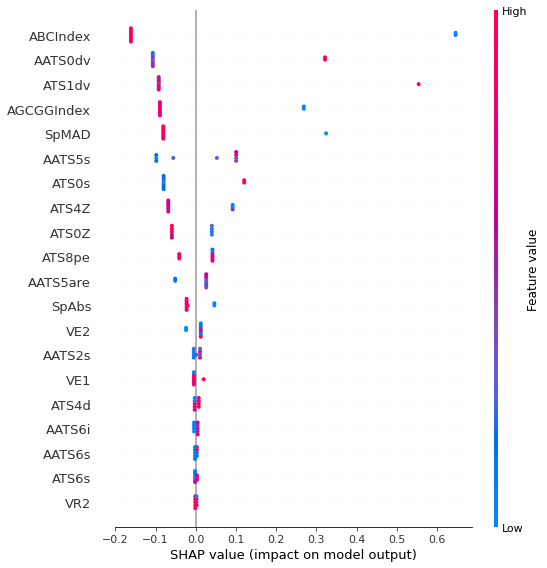

In [13]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

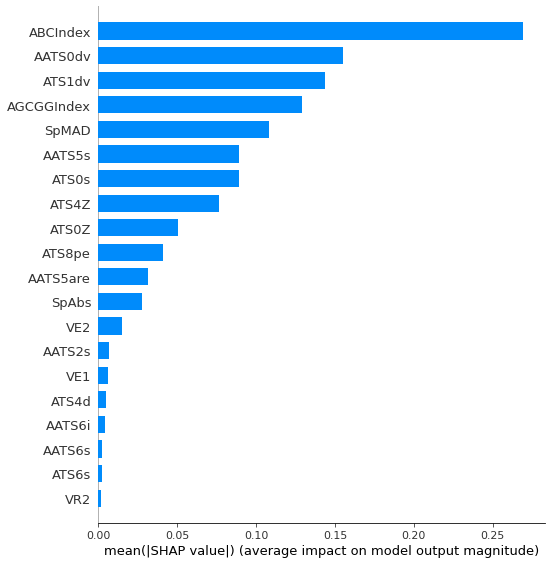

In [14]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns,plot_type='bar')

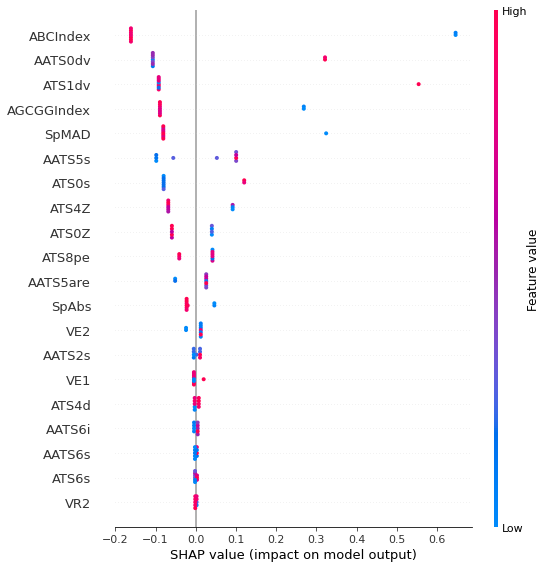

In [15]:
fig = plt.gcf()
shap.summary_plot(shap_values,features=X,feature_names=X.columns)
fig.savefig('XGBoost_Model_SHAP_SummaryPlot.png',format="png",dpi=150,bbox_inches='tight')

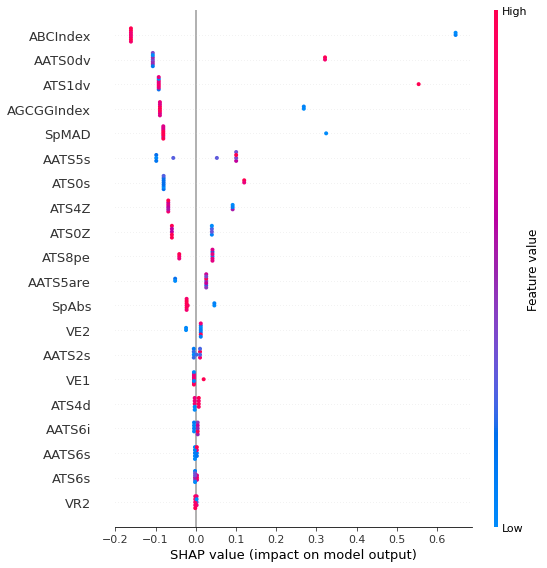

In [17]:
plt.show()
shap.summary_plot(shap_values,features=X,feature_names=X.columns)
plt.savefig('XGBoost_Model_SHAP_SummaryPlot.png',format="png",dpi=150,bbox_inches='tight')
plt.close()